## **Experiments No. 6**

In [1]:

print("\n\nExperiment No. 6\n smita shinde \n UID = 20BCS4643 \n Class BIT_B")




Experiment No. 6
 smita shinde 
 UID = 20BCS4643 
 Class BIT_B


In [10]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns #Understanding my variables


In [11]:
df=pd.read_csv("Marketing_analysis.txt")

C:\Users\smita\AppData\Local\Temp\ipykernel_27352\15434772.py:1: DtypeWarning: Columns (0,1,2,3,11,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("Marketing_analysis.txt")


In [12]:
df.to_csv('Marketing_analysis.csv')

In [13]:
df

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45208,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45209,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45210,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45211,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


In [14]:
# If we observe the above dataset, there are some discrepancies in the Column header for the first 2 rows. 
#The correct data is from the index number 1. So, we have to fix the first two rows.

In [15]:
# Read the file in data without first two rows as it is of no use.
data = pd.read_csv("Marketing_analysis.csv",skiprows = 2)

#print the head of the data frame.
data.head()

,1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,2,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,3,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,4,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,5,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,6,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [16]:
# Now if we observe the above dataset, the customerid column has of no importance to our analysis, 
#and also the jobedu column has both the information of job and education in it.
#
# we’ll drop the customerid column and we’ll split the jobedu column into two other columns job and education and after that, we’ll drop the jobedu column as well.

In [17]:
# Drop the customer id as it is of no use.
data.drop('customerid', axis = 1, inplace = True)

#Extract job  & Education in newly from "jobedu" column.
data['job']= data["jobedu"].apply(lambda x: x.split(",")[0])
data['education']= data["jobedu"].apply(lambda x: x.split(",")[1])

# Drop the "jobedu" column from the dataframe.
data.drop('jobedu', axis = 1, inplace = True)

# Printing the Dataset
data

,1,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,2,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,3,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,4,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,5,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,6,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45208,51.0,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,45209,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45208,45210,72.0,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45209,45211,57.0,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


In [18]:
# Checking the missing values
data.isnull().sum()

1             0
age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [19]:
# Dropping the records with age missing in data dataframe.
data = data[~data.age.isnull()].copy()

In [20]:
# Checking the missing values in the dataset.
data.isnull().sum()

1             0
age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [21]:
# Find the mode of month in data
month_mode = data.month.mode()[0]

# Fill the missing values with mode value of month in data.
data.month.fillna(month_mode, inplace = True)

# Let's see the null values in the month column.
data.month.isnull().sum()

0

In [22]:
data.isnull().sum()

1             0
age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [23]:
#drop the records with response missing in data.
data = data[~data.response.isnull()].copy()
# Calculate the missing values in each column of data frame
data.isnull().sum()

1            0
age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

In [24]:
#Now, let’s analyze the job category by using plots. Since Job is a category, we will plot the bar plot.
#Categorical Unordered Univariate Analysis:
# Let's calculate the percentage of each job status category.
data.job.value_counts(normalize=True)



blue-collar      0.215274
management       0.209273
technician       0.168043
admin.           0.114369
services         0.091849
retired          0.050087
self-employed    0.034853
entrepreneur     0.032860
unemployed       0.028830
housemaid        0.027413
student          0.020770
unknown          0.006377
Name: job, dtype: float64

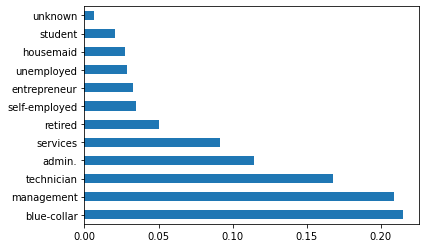

In [25]:

#plot the bar graph of percentage job categories
data.job.value_counts(normalize=True).plot.barh()
plt.show()

In [26]:
#Categorical Ordered Univariate Analysis:
#Month: Jan, Feb, March……
#Education: Primary, Secondary,……
#Now, let’s analyze the Education Variable from the dataset. 
# let’s see how a Pie Chart looks like.
#calculate the percentage of each education category.
data.education.value_counts(normalize=True)





secondary    0.513275
tertiary     0.294192
primary      0.151436
unknown      0.041097
Name: education, dtype: float64

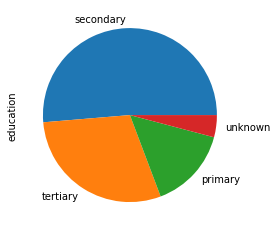

In [27]:
#plot the pie chart of education categories
data.education.value_counts(normalize=True).plot.pie()
plt.show()

By the above analysis, we can infer that the data set has a large number of them belongs to secondary education after that tertiary and next primary. Also, a very small percentage of them have been unknown.
This is how we analyze univariate categorical analysis. If the column or variable is of numerical then we’ll analyze by calculating its mean, median, std, etc. We can get those values by using the describe function.

In [28]:
data.salary.describe()

count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

Bivariate Analysis
If we analyze data by taking two variables/columns into consideration from a dataset, it is known as Bivariate Analysis.
a) Numeric-Numeric Analysis:
Analyzing the two numeric variables from a dataset is known as numeric-numeric analysis. We can analyze it in three different ways.
Scatter Plot
Pair Plot
Correlation Matrix
**Scatter Plot**
Let’s take three columns ‘Balance’, ‘Age’ and ‘Salary’ from our dataset and see what we can infer by plotting to scatter plot between salary balance and age balance

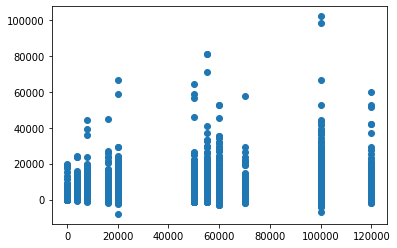

In [29]:
#plot the scatter plot of balance and salary variable in data
plt.scatter(data.salary,data.balance)
plt.show()

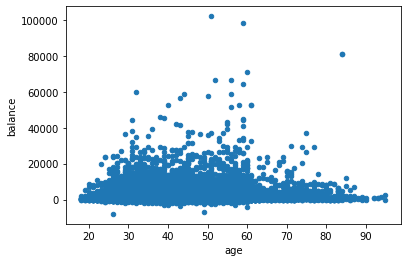

In [30]:
#plot the scatter plot of balance and age variable in data
data.plot.scatter(x="age",y="balance")
plt.show()

Pair Plot
Now, let’s plot Pair Plots for the three columns we used in plotting Scatter plots. We’ll use the seaborn library for plotting Pair Plots.

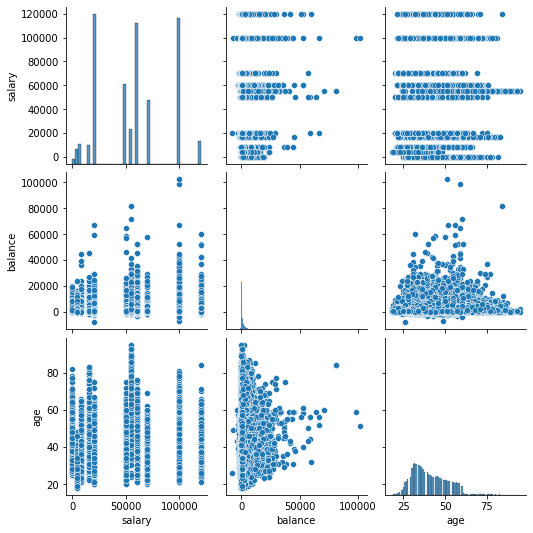

In [31]:
#plot the pair plot of salary, balance and age in data dataframe.
sns.pairplot(data = data, vars=['salary','balance','age'])
plt.show()

Correlation Matrix
Since we cannot use more than two variables as x-axis and y-axis in Scatter and Pair Plots, it is difficult to see the relation between three numerical variables in a single graph. In those cases, we’ll use the correlation matrix.


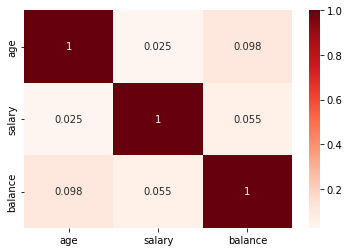

In [32]:
# Creating a matrix using age, salry, balance as rows and columns
data[['age','salary','balance']].corr()

#plot the correlation matrix of salary, balance and age in data dataframe.
sns.heatmap(data[['age','salary','balance']].corr(), annot=True, cmap = 'Reds')
plt.show()

b) Numeric - Categorical Analysis
Analyzing the one numeric variable and one categorical variable from a dataset is known as numeric-categorical analysis. We analyze them mainly using mean, median, and box plots.
Let’s take salary and response columns from our dataset.
First check for mean value using groupby

In [33]:
#groupby the response to find the mean of the salary with response no & yes separately.
data.groupby('response')['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [34]:
#groupby the response to find the median of the salary with response no & yes separately.
data.groupby('response')['salary'].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

By both mean and median we can say that the response of yes and no remains the same irrespective of the person’s salary. But, is it truly behaving like that, let’s plot the box plot for them and check the behavior.

C:\Users\smita\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


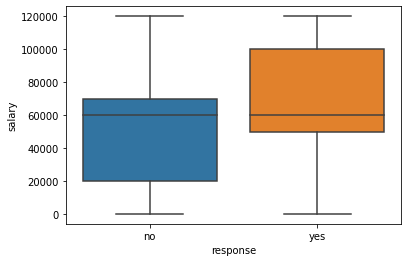

In [35]:
#plot the box plot of salary for yes & no responses.
sns.boxplot(data.response, data.salary)
plt.show()

As we can see, when we plot the Box Plot, it paints a very different picture compared to mean and median. The IQR for customers who gave a positive response is on the higher salary side.
This is how we analyze Numeric-Categorical variables, we use mean, median, and Box Plots to draw some sort of conclusions.

c) Categorical — Categorical Analysis
Since our target variable/column is the Response rate, we’ll see how the different categories like Education, Marital Status, etc., are associated with the Response column. So instead of ‘Yes’ and ‘No’ we will convert them into ‘1’ and ‘0’, by doing that we’ll get the “Response Rate”.

In [36]:
#create response_rate of numerical data type where response "yes"= 1, "no"= 0
data['response_rate'] = np.where(data.response=='yes',1,0)
data.response_rate.value_counts()

0    39876
1     5285
Name: response_rate, dtype: int64

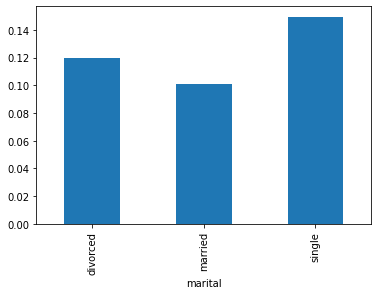

In [37]:
#plot the bar graph of marital status with average value of response_rate
data.groupby('marital')['response_rate'].mean().plot.bar()
plt.show()

By the above graph, we can infer that the positive response is more for Single status members in the data set. Similarly, we can plot the graphs for Loan vs Response rate, Housing Loans vs Response rate, etc.

5. Multivariate Analysis
If we analyze data by taking more than two variables/columns into consideration from a dataset, it is known as Multivariate Analysis.
Let’s see how ‘Education’, ‘Marital’, and ‘Response_rate’ vary with each other.
First, we’ll create a pivot table with the three columns and after that, we’ll create a heatmap.

In [38]:
result = pd.pivot_table(data=data, index='education', columns='marital',values='response_rate')
print(result)

marital    divorced   married    single
education                              
primary    0.138852  0.075601  0.106808
secondary  0.103559  0.094650  0.129271
tertiary   0.137415  0.129835  0.183737
unknown    0.142012  0.122519  0.162879


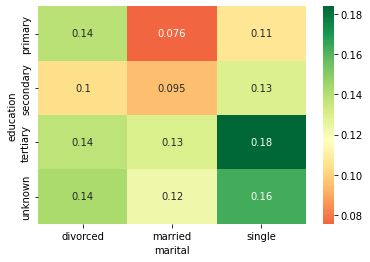

In [39]:
#create heat map of education vs marital vs response_rate
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

Based on the Heatmap we can infer that the married people with primary education are less likely to respond positively for the survey and single people with tertiary education are most likely to respond positively to the survey.
Similarly, we can plot the graphs for Job vs marital vs response, Education vs poutcome vs response, etc.